###1) Calculadora de Média de Notas:

In [3]:
def weighted_average_grade_calculator(grades, weights):
  weighted_sum = sum(grade * weight for grade, weight in zip(grades, weights))
  weights_sum = sum(weights)
  return weighted_sum / weights_sum

# --- Testes ---
print("Iniciando testes...")

# Teste 1: Pesos iguais
notas1 = [10, 8]
pesos1 = [0.5, 0.5]
# Esperado: (10*0.5 + 8*0.5) / 1.0 = 9.0
resultado1 = weighted_average_grade_calculator(notas1, pesos1)
assert resultado1 == 9.0
print("Teste 1 OK")

# Teste 2: Pesos diferentes (soma != 1)
notas2 = [8.0, 9.0, 7.0]
pesos2 = [2, 1, 1] # Ex: P1 tem peso 2, P2 e P3 têm peso 1
# Esperado: (8*2 + 9*1 + 7*1) / (2+1+1) = (16+9+7) / 4 = 32 / 4 = 8.0
resultado2 = weighted_average_grade_calculator(notas2, pesos2)
assert resultado2 == 8.0
print("Teste 2 OK")

# Teste 3: Lidando com floats (precisão)
# É melhor usar uma verificação de proximidade para floats
notas3 = [10, 5]
pesos3 = [0.3, 0.7]
# Esperado: (10*0.3 + 5*0.7) / 1.0 = 3.0 + 3.5 = 6.5
resultado3 = weighted_average_grade_calculator(notas3, pesos3)
assert abs(resultado3 - 6.5) < 0.00001
print("Teste 3 OK")

print("Todos os testes passaram!")

Iniciando testes...
Teste 1 OK
Teste 2 OK
Teste 3 OK
Todos os testes passaram!


###2) Ordenador de Lista:

In [4]:
def merge_sort(array):

  def merge(left, right):
    merged = []
    i, j = 0, 0
    while i < len(left) and j < len(right):
      if left[i] < right[j]:
        merged.append(left[i])
        i += 1
      else:
        merged.append(right[j])
        j += 1
    merged.extend(left[i:])
    merged.extend(right[j:])
    return merged

  size = len(array)
  if size <= 1:
    return array

  mid = size // 2
  left = merge_sort(array[:mid])
  right = merge_sort(array[mid:])

  return merge(left, right)

# --- Testes Rápidos ---
if __name__ == "__main__":
    print("Iniciando testes do Merge Sort...")

    # Teste 1: Lista padrão
    lista1 = [38, 27, 43, 3, 9, 82, 10]
    esperado1 = [3, 9, 10, 27, 38, 43, 82]
    assert merge_sort(lista1) == esperado1
    print("Teste 1 (Padrão) OK")

    # Teste 2: Lista vazia (Edge case)
    lista2 = []
    esperado2 = []
    assert merge_sort(lista2) == esperado2
    print("Teste 2 (Lista Vazia) OK")

    # Teste 3: Lista com duplicatas
    lista3 = [5, 1, 5, 2, 1, 5]
    esperado3 = [1, 1, 2, 5, 5, 5]
    assert merge_sort(lista3) == esperado3
    print("Teste 3 (Duplicatas) OK")

    # Teste 4: Lista já ordenada
    lista4 = [1, 2, 3, 4]
    esperado4 = [1, 2, 3, 4]
    assert merge_sort(lista4) == esperado4
    print("Teste 4 (Já Ordenada) OK")

    print("Todos os testes passaram!")

Iniciando testes do Merge Sort...
Teste 1 (Padrão) OK
Teste 2 (Lista Vazia) OK
Teste 3 (Duplicatas) OK
Teste 4 (Já Ordenada) OK
Todos os testes passaram!


###3) Contador de Caracteres:

In [5]:
def character_counter(string):
  counter = {}
  for char in string:
    if char in counter:
      counter[char] += 1
    else:
      counter[char] = 1
  return counter

# --- Testes Rápidos ---
if __name__ == "__main__":
    print("Iniciando testes do Character Counter...")

    # Teste 1: String padrão
    resultado1 = character_counter("banana")
    esperado1 = {'b': 1, 'a': 3, 'n': 2}
    assert resultado1 == esperado1
    print("Teste 1 (Padrão) OK")

    # Teste 2: String vazia (Edge case)
    resultado2 = character_counter("")
    esperado2 = {}
    assert resultado2 == esperado2
    print("Teste 2 (String Vazia) OK")

    # Teste 3: String com espaços e duplicatas
    resultado3 = character_counter("hello world")
    esperado3 = {'h': 1, 'e': 1, 'l': 3, 'o': 2, ' ': 1, 'w': 1, 'r': 1, 'd': 1}
    assert resultado3 == esperado3
    print("Teste 3 (Com Espaços) OK")

    # Teste 4: Case sensitive (sensível a maiúsculas/minúsculas)
    resultado4 = character_counter("Hello")
    esperado4 = {'H': 1, 'e': 1, 'l': 2, 'o': 1}
    assert resultado4 == esperado4
    print("Teste 4 (Case Sensitive) OK")

    print("Todos os testes passaram!")

Iniciando testes do Character Counter...
Teste 1 (Padrão) OK
Teste 2 (String Vazia) OK
Teste 3 (Com Espaços) OK
Teste 4 (Case Sensitive) OK
Todos os testes passaram!


###4) Processar dados:

In [6]:
import pandas as pd

def total_per_status(precatorios, status):
  df = pd.DataFrame(precatorios)
  return df[df['status'] == status]['valor'].sum()

def group_by_year(precatorios):
  df = pd.DataFrame(precatorios)
  return df.groupby('ano').apply(lambda x: x.to_dict('records')).to_dict()

def order_by_value(precatorios, descending=True):
    df = pd.DataFrame(precatorios)
    ordered_df = df.sort_values(by='valor', ascending=(not descending))
    return ordered_df.to_dict('records')

precatorios = [
    {"id": 1, "valor": 50000, "ano": 2020, "status": "pendente"},
    {"id": 2, "valor": 120000, "ano": 2019, "status": "pago"},
    {"id": 3, "valor": 75000, "ano": 2021, "status": "pendente"},
    {"id": 4, "valor": 200000, "ano": 2019, "status": "pago"},
    {"id": 5, "valor": 30000, "ano": 2022, "status": "pendente"},
]

# --- Testes ---

if __name__ == "__main__":
    print("--- Iniciando Testes ---")

    # --- Teste 1: total_per_status ---
    print("Testando total_per_status...")

    total_pendente = total_per_status(precatorios, "pendente")
    assert total_pendente == 155000  # 50k + 75k + 30k

    total_pago = total_per_status(precatorios, "pago")
    assert total_pago == 320000      # 120k + 200k

    total_cancelado = total_per_status(precatorios, "cancelado")
    assert total_cancelado == 0      # Teste de status inexistente

    print("✅ total_per_status OK")

    # --- Teste 2: group_by_year ---
    print("\nTestando group_by_year...")

    resultado_grupos = group_by_year(precatorios)

    # O groupby do Pandas ordena as chaves (anos)
    grupos_esperados = {
        2019: [
            {"id": 2, "valor": 120000, "ano": 2019, "status": "pago"},
            {"id": 4, "valor": 200000, "ano": 2019, "status": "pago"}
        ],
        2020: [
            {"id": 1, "valor": 50000, "ano": 2020, "status": "pendente"}
        ],
        2021: [
            {"id": 3, "valor": 75000, "ano": 2021, "status": "pendente"}
        ],
        2022: [
            {"id": 5, "valor": 30000, "ano": 2022, "status": "pendente"}
        ]
    }

    assert resultado_grupos == grupos_esperados
    print("✅ group_by_year OK")

    # --- Teste 3: order_by_value ---
    print("\nTestando order_by_value...")

    # Teste 3a: Descendente (padrão)
    res_desc = order_by_value(precatorios, descending=True)
    ids_desc = [item['id'] for item in res_desc]
    assert ids_desc == [4, 2, 3, 1, 5] # 200k, 120k, 75k, 50k, 30k

    # Teste 3b: Ascendente
    res_asc = order_by_value(precatorios, descending=False)
    ids_asc = [item['id'] for item in res_asc]
    assert ids_asc == [5, 1, 3, 2, 4] # 30k, 50k, 75k, 120k, 200k

    print("✅ order_by_value OK")

    print("\n--- Todos os testes passaram com sucesso! ---")

--- Iniciando Testes ---
Testando total_per_status...
✅ total_per_status OK

Testando group_by_year...
✅ group_by_year OK

Testando order_by_value...
✅ order_by_value OK

--- Todos os testes passaram com sucesso! ---


/tmp/ipython-input-391033185.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  return df.groupby('ano').apply(lambda x: x.to_dict('records')).to_dict()


###5) Banco de Dados:

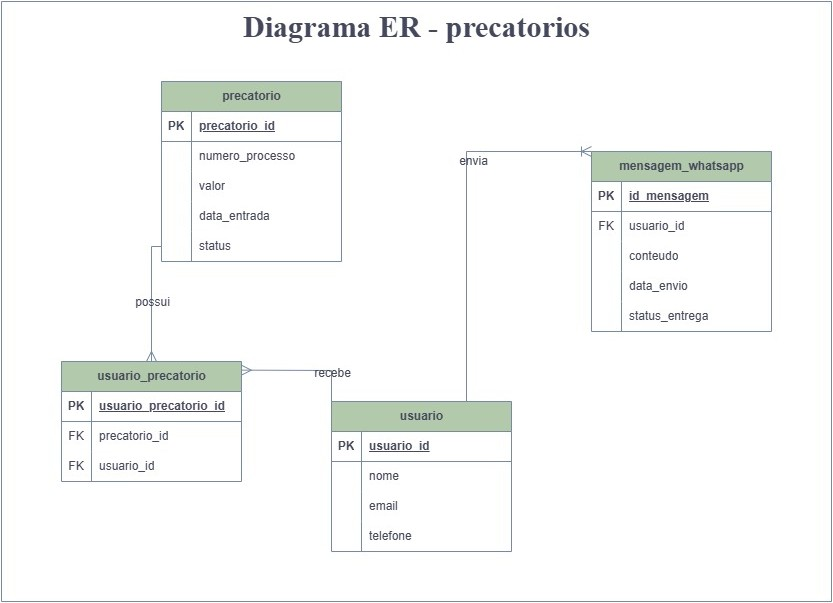

In [2]:
"""
SELECT
  precatorio_id
FROM
  precatorio
JOIN
  usuario_precatorio ON precatorio.id = usuario_precatorio.precatorio_id
WHERE
  usuario_id = ?
ORDER BY
  precatorio.valor DESC;
"""

'\nSELECT\n  precatorio_id\nFROM \n  precatorio\nJOIN\n  usuario_precatorio ON precatorio.id = usuario_precatorio.precatorio_id\nWHERE\n  usuario_id = ?\nORDER BY\n  precatorio.valor DESC;\n'